# Linear Regression Model

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm #create constants
from sklearn import linear_model #model
from sklearn.model_selection import RandomizedSearchCV #hyperparameter tuning
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.decomposition import PCA


In [3]:
#read in, index_col=0 to stop Unnamed: 0 column from populating
train = pd.read_csv('/Users/sa12/Documents/Repositories/PredictPodcastListeningTime/PodcastData/clean_train.csv',index_col=[0])
test = pd.read_csv('/Users/sa12/Documents/Repositories/PredictPodcastListeningTime/PodcastData/clean_test.csv',index_col=[0])


In [4]:
X = train.drop(columns='Listening_Time_minutes')
y =train['Listening_Time_minutes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)# Plot the splitting results
lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
mse = metrics.mean_squared_error(y_test, predictions)
r2 = metrics.r2_score(y_test, predictions)

In [9]:
train

,Episode_Length_minutes,Number_of_Ads,Listening_Time_minutes,Episode_Sentiment
211159,64.83,53.37,50.44892,1
283606,109.93,103.91,103.89696,0
436577,115.25,103.00,103.12686,0
495919,64.83,53.42,50.44892,0
537705,112.27,103.75,103.12686,0
567235,16.13,12.00,6.49000,1
602553,112.27,103.25,103.12686,0
672139,115.74,103.25,103.12686,0
683147,109.93,103.88,103.89696,0


In [6]:
r2

0.999998573942631

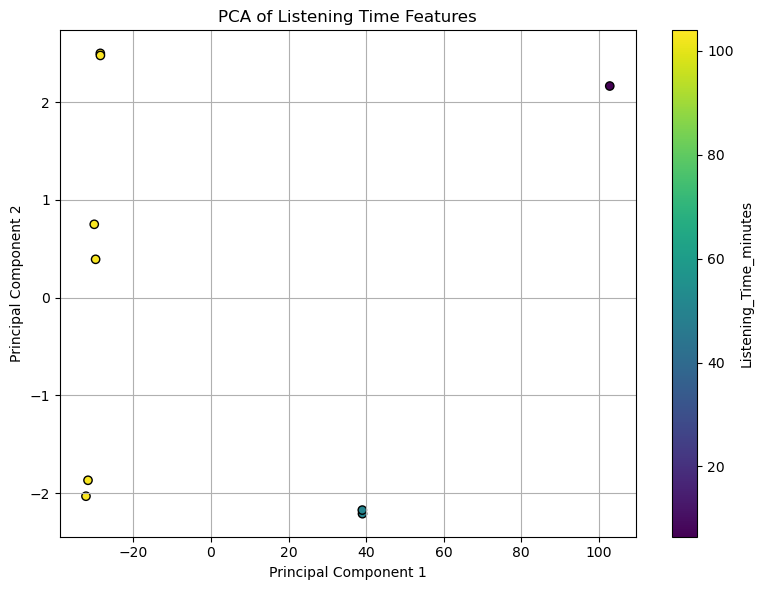

In [8]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the PCA-transformed data, colored by target
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.colorbar(scatter, label='Listening_Time_minutes')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Listening Time Features')
plt.grid(True)
plt.tight_layout()
plt.show()

In [56]:
X.shape

(9, 3)

In [57]:
y.shape

(9, 1)

Slope:		 [[0.02011611 1.03785222 0.        ]]
Intercept:	 -6.295041982674732


/var/folders/t3/tq1z8cy535bck4xjwkvc0_xh0000gn/T/ipykernel_84061/2219923807.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  a = float(lm.intercept_)


ValueError: x and y must be the same size

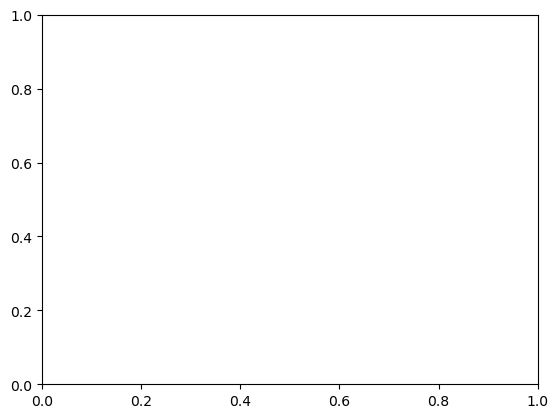

In [62]:
# Extract model parameters
a = float(lm.intercept_)
b = lm.coef_
print("Slope:\t\t", b)
print("Intercept:\t", float(a))

# Generate values that fall along the regression line
gen_y_train = lm.predict(X_train)

# Plot the training data and the regression line
plt.scatter(X_train, y_train, color='green', label='Training data')
plt.plot(X_train, gen_y_train, color='red', label='Regression line')
plt.legend()
plt.show()

Training:
MSE: 0.058855353079922325
R_squared: 0.9998491086171901


ValueError: x and y must be the same size

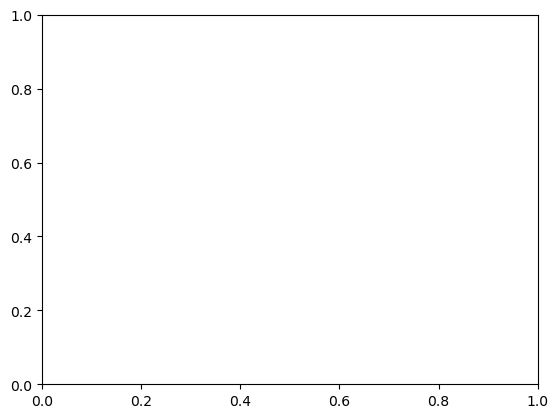

In [63]:
# Evaluate the model on the training data
print("Training:")
print('MSE:', metrics.mean_squared_error(y_train, gen_y_train))
print('R_squared:', metrics.r2_score(y_train, gen_y_train))

# Evaluate the model on the testing data
gen_y_test = lm.predict(X_test)
plt.scatter(X_test, y_test, color='darkblue', label='Testing data')
plt.plot(X_test, gen_y_test, color='red', label='Regression line')
plt.legend()
plt.show()

print("Testing:")
print('MSE:', metrics.mean_squared_error(y_test, gen_y_test))
print('R_squared:', metrics.r2_score(y_test, gen_y_test))

In [40]:
rModel3 = sm.OLS(y_train, X_train)
# Fit the model
rModel3_results = rModel3.fit()

In [41]:
# Evaluate the model
rModel3_results.summary()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1967: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     Listening_Time_minutes   R-squared (uncentered):                   1.000
Model:                                OLS   Adj. R-squared (uncentered):              1.000
Method:                     Least Squares   F-statistic:                          3.287e+04
Date:                    Thu, 08 May 2025   Prob (F-statistic):                    3.70e-09
Time:                            11:57:01   Log-Likelihood:                         -6.8179
No. Observations:                       6   AIC:                                      17.64
Df Residuals:                           4   BIC:                                      17.22
Df Model:                               2                                                  
Covariance Type:                nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Episode_Length_minutes    -0.2575      0.107     -2.412      0.073      -0.554       0.039
Number_of_Ads              1.2760      0.116     10.989      0.000       0.954       1.598
Episode_Sentiment               0          0        nan        nan           0           0
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.491
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.749
Skew:                           0.857   Prob(JB):                        0.688
Kurtosis:                       2.763   Cond. No.                          inf
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [24]:
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [26]:
print(model.score(X_train, y_train))

0.9999104868756075


In [42]:
# Make a variable called y_pred, and assign it the result of calling the predict() method on rModel. Plug X_test into that method.
y_pred = model.predict(X_test)
plt.scatter(y_test,y_pred)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- const
